In [1]:
import os
import glob
from functools import reduce

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Analysis
---

In [3]:
results_dir = "../../../results/apps/sflow/"
date_time_list = ["20170826015447.145605"]

cols = ['in (kbps)', 'out (kbps)'] 

In [4]:
sflow_data_dict = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/sflow_stats__*"):
        key = i.split('__')[1].split('_')[1].split('.')[0]
        sflow_data_dict[key] = pd.read_csv(i, sep='\s*', header=None, skiprows=4, skipfooter=1, na_filter=False, names = cols)
        sflow_data_dict[key] = sflow_data_dict[key][sflow_data_dict[key]['out (kbps)'] >= 1]

# sorted(broker_data_dict.keys())

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/opt/conda/lib/python3.5/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/opt/conda/lib/python3.5/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [6]:
plot_data_dict = pd.DataFrame()

cols = [1, 2, 4, 8, 16, 32, 64, 128]

plot_data_dict['subscribers'] = cols

rows = []
for i in plot_data_dict['subscribers']:
    rows += [sflow_data_dict[str(i)]['out (kbps)'].mean()]
plot_data_dict['unicast: throughput (kbps)'] = rows    

rows = []
for i in plot_data_dict['subscribers']:
    rows += [sflow_data_dict[str(1)]['out (kbps)'].mean()]
plot_data_dict['baseerat: throughput (kbps)'] = rows    

plot_data_dict = plot_data_dict.set_index('subscribers')

# plot_data_dict

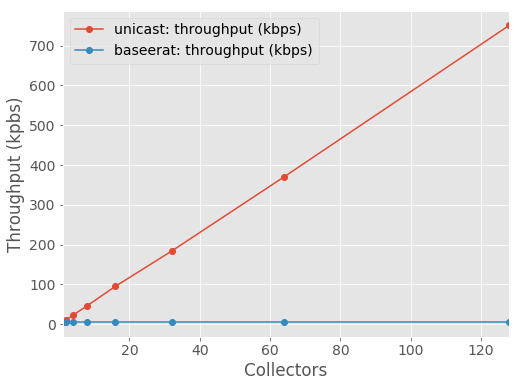

In [7]:
ax = plot_data_dict[['unicast: throughput (kbps)', 'baseerat: throughput (kbps)']].plot(kind='line', marker='o')
ax.set(xlabel='Collectors', ylabel='Throughput (kpbs)')
plt.savefig('sflow-throughput-kbps.pdf')
plt.show()

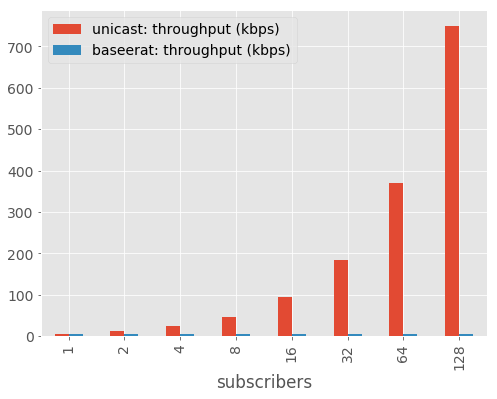

In [8]:
plot_data_dict[['unicast: throughput (kbps)', 'baseerat: throughput (kbps)']].plot(kind='bar')

In [16]:
sns_plot_data = pd.DataFrame()

subscribers = [1, 2, 4, 8, 16, 32, 64, 128]

subs = []
rows = []
types = []

for i in subscribers:
    subs += [i for _ in range(len(sflow_data_dict[str(i)]['out (kbps)']))]
    rows += list(sflow_data_dict[str(i)]['out (kbps)'])
    types += ['Unicast' for _ in range(len(sflow_data_dict[str(i)]['out (kbps)']))]
    
for i in subscribers:
    subs += [i for _ in range(len(sflow_data_dict[str(1)]['out (kbps)']))]
    rows += list(sflow_data_dict[str(1)]['out (kbps)'])
    types += ['Baseerat' for _ in range(len(sflow_data_dict[str(1)]['out (kbps)']))]

sns_plot_data['collectors'] = subs
sns_plot_data['bandwidth (kbps)'] = rows
sns_plot_data[''] = types    
    
# sns_plot_data

In [58]:
sns_plot_data['bandwidth (kbps)'].where(sns_plot_data[''] == 'Unicast').where(sns_plot_data['collectors'] == 64).describe()

count     24.000000
mean     370.350833
std       36.815781
min      280.930000
25%      355.655000
50%      371.645000
75%      392.132500
max      442.930000
Name: bandwidth (kbps), dtype: float64

In [59]:
sns_plot_data['bandwidth (kbps)'].where(sns_plot_data[''] == 'Unicast').where(sns_plot_data['collectors'] == 1).describe()

count    24.000000
mean      5.835000
std       0.049519
min       5.660000
25%       5.850000
50%       5.850000
75%       5.850000
max       5.850000
Name: bandwidth (kbps), dtype: float64

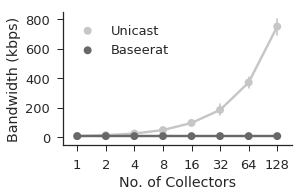

In [57]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='collectors', y='bandwidth (kbps)', hue='', data=sns_plot_data, palette="Greys",
                   size=3, kind="point", legend=True, legend_out=False, aspect=1.5, ci='sd', scale=1.5)
ax.set(xlabel='No. of Collectors', ylabel='Bandwidth (kbps)')
plt.savefig('sflow-bandwidth-kbps.pdf')
plt.show()